In [1]:
import numpy as np
import matplotlib.pyplot as plt

from anomaly_gaussian import gaussian, p, choose_threshold


In [5]:
# Generate 100 training examples with 2 features (standard normal distribution)
X_train = np.random.randn(50, 2)

# Generate test examples that include anomalies
X_cv = np.random.randn(50, 2)
y_cv = np.zeros(50)

for i in range(X_cv.shape[0]):
    # Multiply examples by random numbers to create anomalies
    rand = np.random.randint(-4, 5)
    X_cv[i] *= rand

    if np.abs(rand) > 3: # say that these will be anomalies
        y_cv[i] = 1

print("X_train")
print(X_train[:5])
print("\nX_cv")
print(X_cv[:5])
print("y_cv")
print(y_cv[:5])


X_train
[[ 1.11804813  0.47370172]
 [ 0.1657985  -0.04650189]
 [ 0.51597029 -0.72116137]
 [ 1.72140991  0.7059106 ]
 [-1.42356266  1.13477805]]

X_cv
[[-0.33500269  0.51750766]
 [ 0.86845516 -1.65244248]
 [-2.35358892  3.68591142]
 [-0.41792244 -0.78627263]
 [11.57658237  6.92042691]]
y_cv
[0. 0. 1. 0. 1.]


In [6]:
# Build Gaussian distribution
mean, variance = gaussian(X_train)

# Calculate probabilities of test examples
m = X_cv.shape[0]
probabilities = np.zeros(m)
for i in range(m):
    probabilities[i] = p(X_cv[i], mean, variance)

# Choose best epsilon
epsilon = choose_threshold(probabilities, y_cv)
print(f"Epsilon: {epsilon}")


Epsilon: 0.00042810818760900143


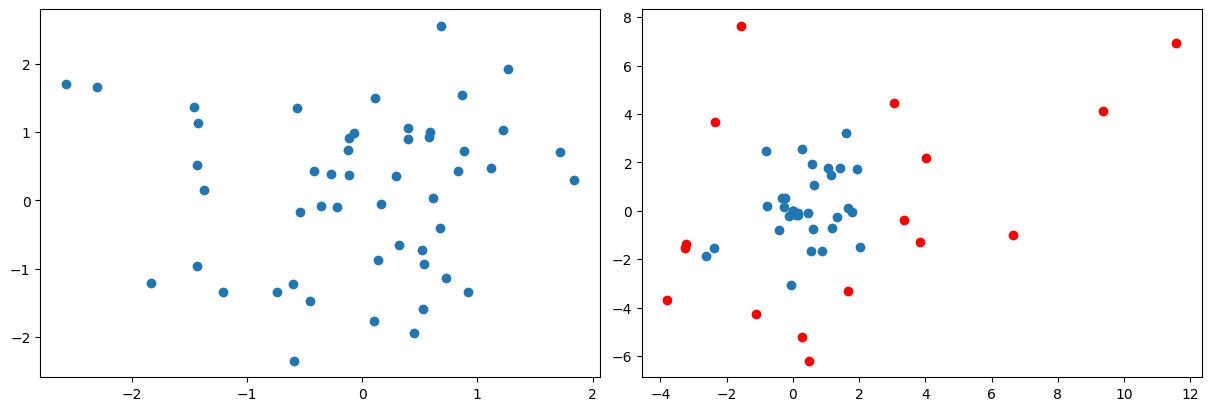

In [7]:
# Plot our results
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax.flat[0].scatter(X_train[:, 0], X_train[:, 1])

predictions = (probabilities < epsilon)
normals = X_cv[predictions == 0]
anomalies = X_cv[predictions == 1]
ax.flat[1].scatter(normals[:, 0], normals[:, 1])
ax.flat[1].scatter(anomalies[:, 0], anomalies[:, 1], color="r")
